In [22]:
import numpy as np
import math
from abc import ABC, abstractmethod
from numpy.random import default_rng
import matplotlib.pyplot as plt
rng = default_rng()
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression




# Generating  Data

In [154]:
## Generate data points
class Data2D:
    
    def __init__(self, slope = (1, 1), noise_variance = 1 ):
        
        # intialize member variables here 
        self.slope = slope
        self.noise_variance = noise_variance
        
        
        
    def generate_points(self, N = 50):
    
        slope = self.slope
        noise_variance = self.noise_variance

        # initialize noise epsilon 
        epsilon = rng.normal(0, noise_variance**(1/2), N)

        ## Generate N points

        # Adding the X_0 coordinates full of ones for vector multiplications
        X_0 = np.ones(N)
        # for X_1 generate random points between -15,15
        X_1 = 30*(np.random.random(N)-0.5)

        # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
        X = np.vstack( [X_0, X_1]).transpose()

        # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
        # line parameters (a,b, c) are stored in a local variable

        y = X.dot(np.array(slope)) + epsilon

        return X, y

    def generate_outliers(self, N):
        pass 

    

        
     
     
   


    


## Scatter plot
## Scatter residual plot
## Check Leverage points video

In [127]:
def generate_data(slope = (1,1), noise_variance=1, N = 50):
    
    # initialize noise epsilon 
    epsilon = rng.normal(0, noise_variance**(1/2), N)
    
    ## Generate N points
    
    # Adding the X_0 coordinates full of ones for vector multiplications
    X_0 = np.ones(N)
    # for X_1 generate random points between -15,15
    X_1 = 30*(np.random.random(N)-0.5)
    
    # We create a design matrix, where rows are datapoints and columns are features, or input dimensions
    X = np.vstack( [X_0, X_1]).transpose()
    
    # initialize **y** with the equation of line here. Equation of line is written in the desciption above, 
    # line parameters (a,b, c) are stored in a local variable

    y = X.dot(np.array(slope)) + epsilon
    
    return X, y

  


In [128]:
def regression(X, y) :
    reg = LinearRegression().fit(X.reshape(-1,1), y)
    
    return reg.coef_[0], reg.intercept_, reg.score(X, y)

    

Regression slope : 2.014 Regression intercept : -1.008 Regression score : 0.988


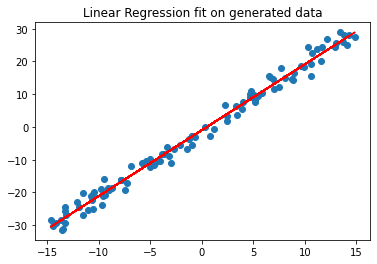

In [193]:
s = (-1,2)
X, y = generate_data(s, 4, 100)
a, b, c = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(X[:,1],a*X[:,1]+b, c='red')
plt.scatter(X[:,1],y)
plt.title('Linear Regression fit on generated data')
plt.show();

In [194]:
## Adding one outlier
outlier = (20,0)
Xo = np.append(X[:,1],outlier[0])
yo = np.append(y,outlier[1])



Regression slope : 1.918 Regression intercept : -1.444 Regression score : 0.943


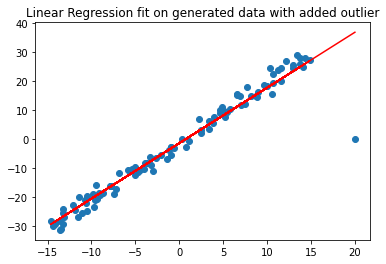

In [195]:
a, b, c = regression(Xo.reshape(-1,1), yo)
print('Regression slope : %.3f' % a, 'Regression intercept : %.3f' % b, 'Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red')
plt.scatter(Xo,yo)
plt.title('Linear Regression fit on generated data with added outlier')

plt.show();

Regression slope : 1.676 Regression intercept : -0.698 Regression score : 0.871
The outlier is : (-50, -30)
The outlier distance from the green line is : 31.75
The outlier distance from the red line is : 27.92


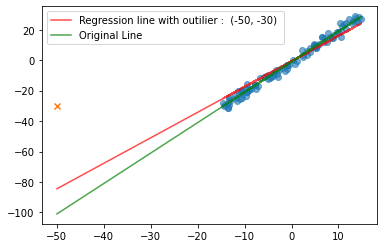

Regression slope : 1.740 Regression intercept : -0.707 Regression score : 0.897
The outlier is : (-45, -30)
The outlier distance from the green line is : 27.28
The outlier distance from the red line is : 24.42


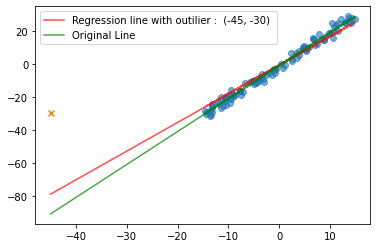

Regression slope : 1.802 Regression intercept : -0.727 Regression score : 0.922
The outlier is : (-40, -30)
The outlier distance from the green line is : 22.81
The outlier distance from the red line is : 20.77


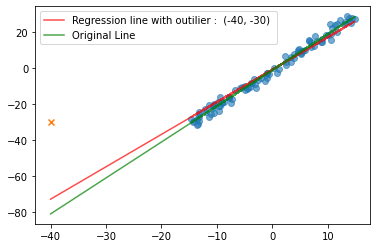

Regression slope : 1.859 Regression intercept : -0.757 Regression score : 0.944
The outlier is : (-35, -30)
The outlier distance from the green line is : 18.34
The outlier distance from the red line is : 16.97


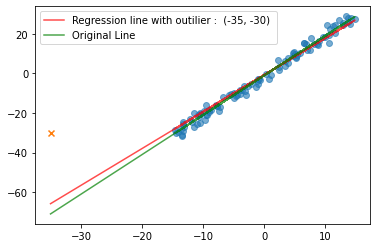

Regression slope : 1.910 Regression intercept : -0.799 Regression score : 0.962
The outlier is : (-30, -30)
The outlier distance from the green line is : 13.86
The outlier distance from the red line is : 13.04


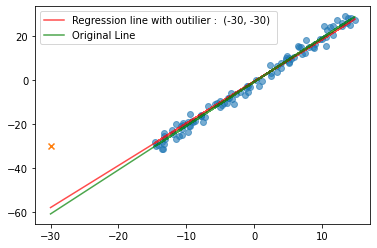

Regression slope : 1.954 Regression intercept : -0.852 Regression score : 0.976
The outlier is : (-25, -30)
The outlier distance from the green line is : 9.39
The outlier distance from the red line is : 8.97


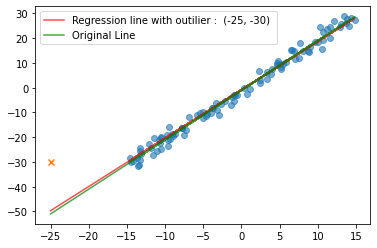

Regression slope : 1.988 Regression intercept : -0.919 Regression score : 0.985
The outlier is : (-20, -30)
The outlier distance from the green line is : 4.92
The outlier distance from the red line is : 4.80


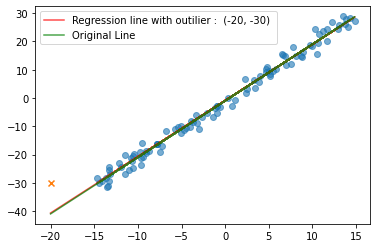

Regression slope : 2.012 Regression intercept : -0.997 Regression score : 0.988
The outlier is : (-15, -30)
The outlier distance from the green line is : 0.45
The outlier distance from the red line is : 0.52


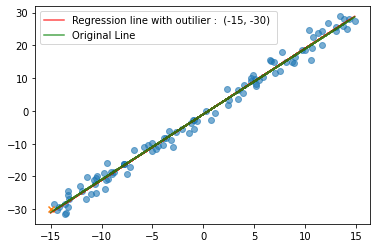

Regression slope : 2.024 Regression intercept : -1.087 Regression score : 0.986
The outlier is : (-10, -30)
The outlier distance from the green line is : 4.02
The outlier distance from the red line is : 3.84


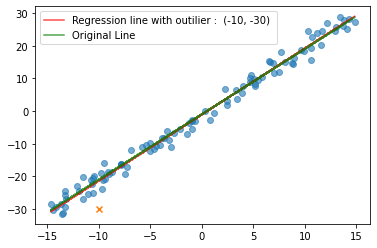

Regression slope : 2.024 Regression intercept : -1.187 Regression score : 0.978
The outlier is : (-5, -30)
The outlier distance from the green line is : 8.50
The outlier distance from the red line is : 8.28


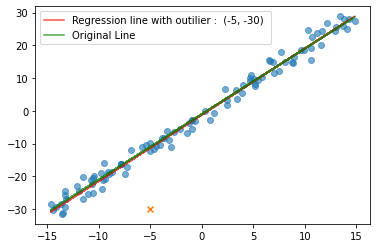

Regression slope : 2.012 Regression intercept : -1.296 Regression score : 0.963
The outlier is : (0, -30)
The outlier distance from the green line is : 12.97
The outlier distance from the red line is : 12.78


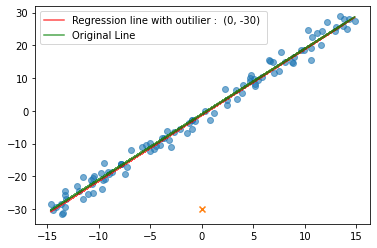

Regression slope : 1.986 Regression intercept : -1.412 Regression score : 0.943
The outlier is : (5, -30)
The outlier distance from the green line is : 17.44
The outlier distance from the red line is : 17.32


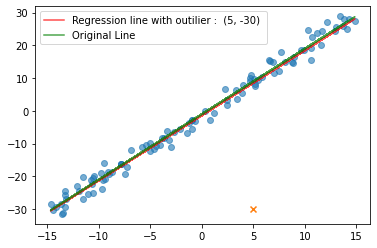

Regression slope : 1.949 Regression intercept : -1.532 Regression score : 0.917
The outlier is : (10, -30)
The outlier distance from the green line is : 21.91
The outlier distance from the red line is : 21.89


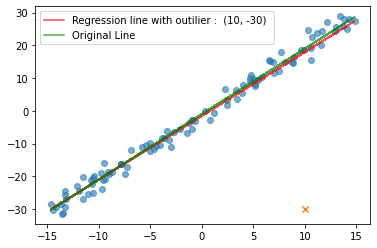

Regression slope : 1.902 Regression intercept : -1.654 Regression score : 0.887
The outlier is : (15, -30)
The outlier distance from the green line is : 26.39
The outlier distance from the red line is : 26.47


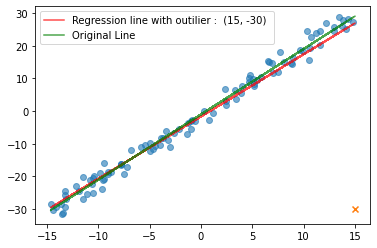

Regression slope : 1.844 Regression intercept : -1.777 Regression score : 0.853
The outlier is : (20, -30)
The outlier distance from the green line is : 30.86
The outlier distance from the red line is : 31.03


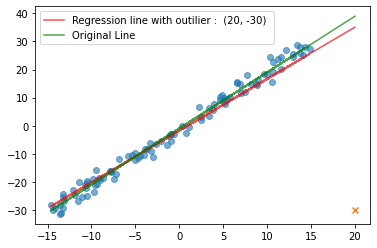

Regression slope : 1.779 Regression intercept : -1.897 Regression score : 0.815
The outlier is : (25, -30)
The outlier distance from the green line is : 35.33
The outlier distance from the red line is : 35.56


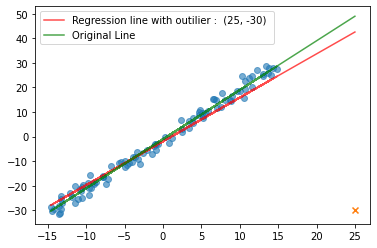

Regression slope : 1.708 Regression intercept : -2.013 Regression score : 0.776
The outlier is : (30, -30)
The outlier distance from the green line is : 39.80
The outlier distance from the red line is : 40.03


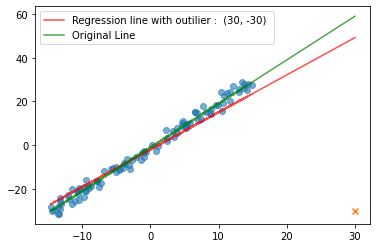

Regression slope : 1.632 Regression intercept : -2.123 Regression score : 0.735
The outlier is : (35, -30)
The outlier distance from the green line is : 44.27
The outlier distance from the red line is : 44.41


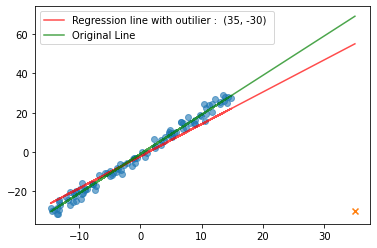

Regression slope : 1.553 Regression intercept : -2.227 Regression score : 0.693
The outlier is : (40, -30)
The outlier distance from the green line is : 48.75
The outlier distance from the red line is : 48.67


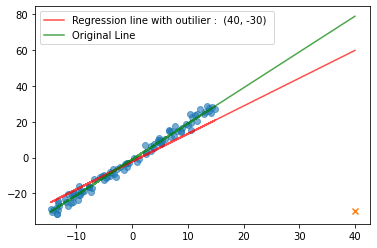

Regression slope : 1.473 Regression intercept : -2.323 Regression score : 0.651
The outlier is : (45, -30)
The outlier distance from the green line is : 53.22
The outlier distance from the red line is : 52.78


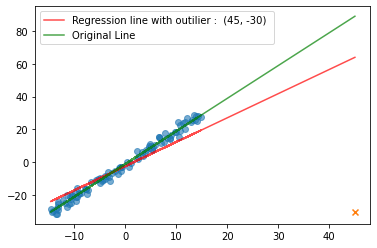

In [196]:
## Studying the impact of adding one outlier on randomly generated data with one outlier
## Each time we change the outlier and see what happens
slopes = []
intercepts = []
reg_score = []
distances = []
for i in range(100):
    outlier = (-50+i, -30)
    Xo = np.append(X[:,1],outlier[0])
    yo = np.append(y,outlier[1])
    slope, intercept, score = regression(Xo.reshape(-1,1), yo)
    slopes.append(slope)
    intercepts.append(intercept)
    reg_score.append(score)
    a = s[1]
    b = s[0]
    distance = np.absolute((a*outlier[0]+b-outlier[1])/(np.sqrt(a**2+1)))
    distance_reg = np.absolute((slope*outlier[0]+intercept-outlier[1])/(np.sqrt(slope**2+1)))
    distances.append(distance)
    if i%5 == 0 :
        print('Regression slope : %.3f' % slope, 'Regression intercept : %.3f' % intercept, 'Regression score : %.3f' % score)
        print('The outlier is :', outlier)
        print('The outlier distance from the green line is : %.2f' % distance)
        print('The outlier distance from the red line is : %.2f' % distance_reg)
        z = np.ones(len(y)+1)
        z[len(y)] = 0
        plt.plot(Xo,slope*Xo+intercept, c='red', label = f'Regression line with outilier :  {outlier} ', alpha = 0.7)
        plt.plot(Xo,a*Xo+b, c='green', label = f'Original Line', alpha = 0.7)
        plt.scatter(Xo[:len(y)],yo[:len(y)], marker = 'o', cmap='Spectral', alpha = 0.6 )
        plt.scatter(Xo[len(y)],yo[len(y)], marker = 'x', cmap='summer')
        plt.legend(loc = 'upper left')
        plt.show();
    
    
    

## Conclusion :

The outlier pulls the line towards it. The further the outlier is from the line the stronger the pull, and the strong it's effect on the regression score.

# How to detect outliers ? 

Outliers are the points most distant to the line, let's look at an example

### Generating Data

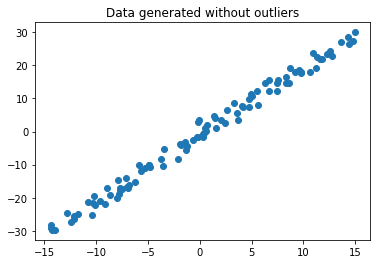

In [205]:
## Lets generate some points

data = Data2D(s, 3)
X, y = data.generate_points(100)
plt.scatter(X[:,1],y)
plt.title('Data generated without outliers')
plt.show();

### Adding outliers

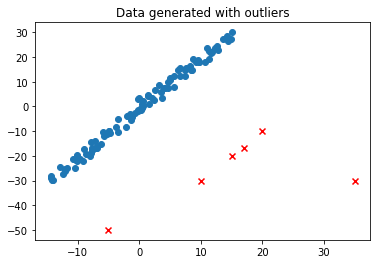

In [206]:
## Adding 6 outliers
outliers = [(20,-10), (35,-30), (17,-17), (10,-30), (-5, -50), (15,-20)]
x_outliers = np.array([outliers[i][0] for i in range(len(outliers))])
y_outliers = np.array([outliers[i][1] for i in range(len(outliers))])

Xo = np.concatenate((X[:,1],x_outliers), axis=0)
yo = np.concatenate((y,y_outliers), axis=0)

plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Data generated with outliers')
plt.show();


Regression slope : 2.020 Regression intercept : -0.889 Regression score : 0.990
Outliers Regression slope : 1.341 Outliers Regression intercept : -3.389 Outliers Regression score : 0.492


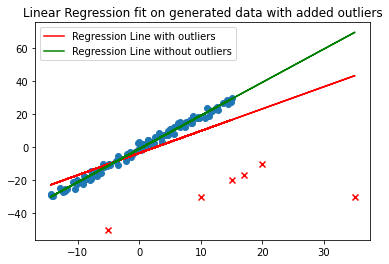

In [207]:
a, b, c = regression(Xo.reshape(-1,1), yo)
a1, b1, c1 = regression(X[:,1].reshape(-1,1), y)
print('Regression slope : %.3f' % a1, 'Regression intercept : %.3f' % b1, 'Regression score : %.3f' % c1)
print('Outliers Regression slope : %.3f' % a, 'Outliers Regression intercept : %.3f' % b, 'Outliers Regression score : %.3f' % c)
plt.plot(Xo,a*Xo+b, c='red', label='Regression Line with outliers')
plt.plot(Xo,a1*Xo+b1, c='green', label='Regression Line without outliers')
plt.legend(loc='upper left')
plt.scatter(X[:,1],y)
plt.scatter(x_outliers,y_outliers, c='red', marker='x')
plt.title('Linear Regression fit on generated data with added outliers')
plt.show();

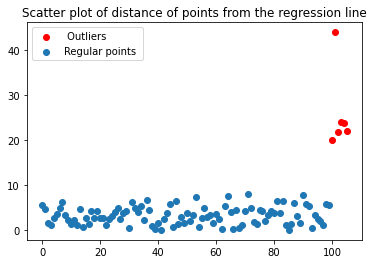

In [216]:
## Checking distance of the points from the fitted line
### We use the line fitted with outliers supposing that we havent removed them yet

distances = []
for i in range(len(yo)):
    distance = np.absolute((a*Xo[i]+b-yo[i])/(np.sqrt(a**2+1)))
    distances.append(distance)

points = np.arange(len(yo))
cm = np.ones(len(yo))
cm[:-6] = 0
plt.scatter(points[-6:], distances[-6:], c='red', label=' Outliers ')
plt.scatter(points[:-6], distances[:-6], label = 'Regular points ')
plt.legend()
plt.title('Scatter plot of distance of the points from the regression line')
plt.show();